In [346]:
# Import librariesmodel = RandomForestClassifier()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor, CatBoostClassifier

pd.set_option('max_colwidth', 500)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [347]:
# Load files
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
samplesubmission = pd.read_csv('SampleSubmission.csv')
variable_definations = pd.read_csv('VariableDefinitions.csv')



In [348]:
# m = max(train['population'])
# for i in range(train.shape[0]):
#     train['population'][i] /= m

In [349]:
# m = max(test['population'])
# for i in range(test.shape[0]):
#     train['population'][i] /= m

In [350]:
# a = ['population', 'age', 'Q2', 'Q3', 'Q7', 'Q8', 'Q9', 'Q15', 'Q16', 'Q17a', 'Q17b', 'Q20', 'Q24', 'Q25', 'Q26', 'Q27']
# a = ['Q7']
# train = train.drop(a, axis=1)

# print(train[["target","age"]].corr())


In [351]:
# test = test.drop(a, axis=1)

In [352]:
# # Category columns
# all_data = train
# cat_cols = ['country', 'region', 'owns_mobile'] + [x for x in all_data.columns if x.startswith('Q')]
# num_cols = ['age', 'population']
# # num_cols = []

# # Change columns to their respective datatypes


In [353]:
# Combine train and test set
ntrain = train.shape[0] # to be used to split train and test set from the combined dataframe

all_data = pd.concat((train, test)).reset_index(drop=True)
print(f'The shape of the combined dataframe is: {all_data.shape}')

The shape of the combined dataframe is: (149810, 36)


In [354]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149810 entries, 0 to 149809
Data columns (total 36 columns):
ID             149810 non-null object
Q1             149810 non-null int64
Q10a           149810 non-null int64
Q10b           149810 non-null int64
Q11            149810 non-null int64
Q12            149810 non-null int64
Q13a           149810 non-null int64
Q14            149810 non-null int64
Q15            149810 non-null int64
Q16            149810 non-null int64
Q17a           149810 non-null int64
Q17b           149810 non-null int64
Q19            115206 non-null float64
Q2             68137 non-null float64
Q20            115206 non-null float64
Q21            149810 non-null int64
Q22            149810 non-null int64
Q23            53580 non-null float64
Q24            149810 non-null int64
Q25            149810 non-null int64
Q26            115206 non-null float64
Q27            83535 non-null float64
Q28            105372 non-null float64
Q3             64562 non-n

In [355]:
# Category columns
cat_cols = ['country', 'region', 'owns_mobile'] + [x for x in all_data.columns if x.startswith('Q')]
num_cols = ['age', 'population']

# Change columns to their respective datatypes
all_data[cat_cols] = all_data[cat_cols].astype('category')

# Confirm whether the changes have been successful
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149810 entries, 0 to 149809
Data columns (total 36 columns):
ID             149810 non-null object
Q1             149810 non-null category
Q10a           149810 non-null category
Q10b           149810 non-null category
Q11            149810 non-null category
Q12            149810 non-null category
Q13a           149810 non-null category
Q14            149810 non-null category
Q15            149810 non-null category
Q16            149810 non-null category
Q17a           149810 non-null category
Q17b           149810 non-null category
Q19            115206 non-null category
Q2             68137 non-null category
Q20            115206 non-null category
Q21            149810 non-null category
Q22            149810 non-null category
Q23            53580 non-null category
Q24            149810 non-null category
Q25            149810 non-null category
Q26            115206 non-null category
Q27            83535 non-null category
Q28           

In [356]:
# Fill in missing values
# For cat cols and date cols fill in with mode and for num cols fill in with 9999
for col in all_data.columns:
  if col in cat_cols:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])
  elif col in num_cols:
    all_data[col] = all_data[col].fillna(all_data[col].mean())

# Confirm that there aren't any missing values

In [357]:
#Using Pearson Correlation
# plt.figure(figsize=(12,10))
# cor = all_data.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()
# cor

In [358]:
# #Correlation with output variable
# cor_target = abs(cor["target"])
# # #Selecting highly correlated features
# relevant_features = cor_target[cor_target<0.01]
# relevant_features
# # cor_target

In [359]:
# Use one hot encoding to turn categorical features to numerical features
# Encode categorical features
all_data[cat_cols] = all_data[cat_cols].astype('category')
all_data = pd.get_dummies(data = all_data, columns = cat_cols)
all_data.head()

,ID,age,population,target,country_Afghanistan,country_Albania,country_Algeria,country_Argentina,country_Armenia,country_Australia,...,Q7_3.0,Q7_4.0,Q8_1.0,Q8_2.0,Q8_3.0,Q8_4.0,Q9_1.0,Q9_2.0,Q9_3.0,Q9_4.0
0,ID_0000020532,66.0,25550170.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,ID_0000075765,44.0,4591023.0,1.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,ID_0000085491,29.0,25550170.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,ID_0000144505,44.0,30491168.0,1.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,ID_0000214184,36.0,93002320.0,1.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [360]:
# train = all_data

In [361]:
# # Category columns
# all_data = test
# cat_cols = ['country', 'region', 'owns_mobile'] + [x for x in all_data.columns if x.startswith('Q')]
# num_cols = ['age', 'population']

# # num_cols = []
# # Change columns to their respective datatypes
# all_data[cat_cols] = all_data[cat_cols].astype('category')

In [362]:
# # Fill in missing values
# # For cat cols and date cols fill in with mode and for num cols fill in with 9999
# for col in all_data.columns:
#   if col in cat_cols:
#     all_data[col] = all_data[col].fillna(all_data[col].mode()[0])
#   elif col in num_cols:
#     all_data[col] = all_data[col].fillna(all_data[col].mean())

# # Confirm that there aren't any missing values

In [363]:
# # Use one hot encoding to turn categorical features to numerical features
# # Encode categorical features
# all_data = pd.get_dummies(data = all_data, columns = cat_cols)
# all_data.head()

In [364]:
# test = all_data

In [365]:
# Separate train and test data from the combined dataframe
train_df = all_data[:ntrain]
test_df = all_data[ntrain:]

# Check the shapes of the split dataset
train_df.shape, test_df.shape

((104867, 276), (44943, 276))

In [366]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149810 entries, 0 to 149809
Columns: 276 entries, ID to Q9_4.0
dtypes: float64(3), object(1), uint8(272)
memory usage: 43.4+ MB


In [367]:
# Select main columns to be used in training
main_cols = all_data.columns.difference(['ID', 'target'])
# X = train[main_cols]
# y = train.target.astype(int)
X = train_df[main_cols]
y = train_df.target.astype(int)
# Split data into train and test sets
ans = []
for i in range(40, 60):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=80)

    # Train model
    model = CatBoostRegressor(verbose=0, random_state=i)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    acc = roc_auc_score(y_test, y_pred)
    ans.append((acc, i))
    print(acc, i)
ans.sort()
print(ans)
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=80)

# model = CatBoostRegressor(verbose=0)
# model.fit(X, y)

# # Make predictions
# y_pred = model.predict(X_test)
# print(f'AUC score on the X_test is: {roc_auc_score(y_test, y_pred)}\n')


0.804931836621956 40
0.8050935290424495 41
0.8045552637030966 42
0.8043789083654173 43
0.8045609471651265 44
0.8046014449434735 45
0.8043769315992441 46
0.8049002788878967 47
0.8044021006241604 48
0.8045680743094822 49
0.8044251870958363 50
0.8049912682110363 51
0.804827825118297 52
0.8048090240599616 53
0.8051187188099279 54
0.8046125048776135 55
0.804428593024542 56
0.8045565165538506 57
0.8044014078225843 58
0.8051088619443928 59
[(0.8043769315992441, 46), (0.8043789083654173, 43), (0.8044014078225843, 58), (0.8044021006241604, 48), (0.8044251870958363, 50), (0.804428593024542, 56), (0.8045552637030966, 42), (0.8045565165538506, 57), (0.8045609471651265, 44), (0.8045680743094822, 49), (0.8046014449434735, 45), (0.8046125048776135, 55), (0.8048090240599616, 53), (0.804827825118297, 52), (0.8049002788878967, 47), (0.804931836621956, 40), (0.8049912682110363, 51), (0.8050935290424495, 41), (0.8051088619443928, 59), (0.8051187188099279, 54)]


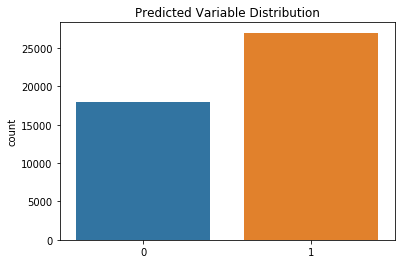

In [368]:
# Make prediction on the test set
# test = test[main_cols]
test_df = test_df[main_cols]
# predictions1 = model.predict(test_df)
# predictions2 = model2.predict(test_df)

# predictions  = (predictions1 + predictions2) / 2.0
predictions = model.predict(test_df)
# # Create a submission file
sub_file = samplesubmission.copy()
sub_file.target = predictions

# # Check the distribution of your predictions
sns.countplot([1 if x >= 0.5 else 0 for x in sub_file.target])
plt.title('Predicted Variable Distribution');

In [369]:
# Create a csv file and upload to zindi 
sub_file.to_csv('Baseline4.csv', index = False)
sub_file.head() 
# i dont know what i am doing, heeeeeeeeeelp

,ID,target
0,ID_0000005111,0.820240
1,ID_0000389416,0.226901
2,ID_0000634789,0.594738
3,ID_0000778100,0.998616
4,ID_0001123210,0.577507
